In [1]:
import numpy as np
import pandas as pd
import os
import scipy 
from scipy.interpolate import RegularGridInterpolator

%matplotlib inline
import matplotlib.pyplot as plt

from pyfrac.visualisation.plotting_support import explode_volume

# Geometry
rec file from : https://github.com/ToC2ME/ToC2ME/blob/master/Rodriguez-Pradilla/LinEpiLoc_ToC2ME_Demo/ToC2ME_Demo_recloc.txt\

    Receivers' location from the Shallow-Borehole monitoring array
    "NL" network code in IRIS database
    Relative coordinates in metres
    Input File: ToC2ME_Demo_recloc.txt 

In [2]:
datum = -980

mod_xmin = 1075
mod_ymin = 1915.0 


In [3]:
rec_outpath = '/home/birniece/Documents/data/ToC2ME/Receivers'
rec_file = '/home/birniece/Documents/data/ToC2ME/Receivers/ToC2ME_Demo_recloc.txt'

In [4]:
recDF = pd.read_csv(rec_file)
recDF.head()

,StationName,NAD83_X_m,NAD83_Y_m,z_m,DrillDepth_m,LoadedDepth_m
0,1,3422.9603,2117.611,919.293356,27,27
1,2,4288.1870,2072.621,908.303961,27,27
2,3,6782.7966,2903.516,900.890654,27,24
3,4,3235.7770,2588.658,923.843327,27,27
4,5,3700.0376,3062.286,911.115825,27,27


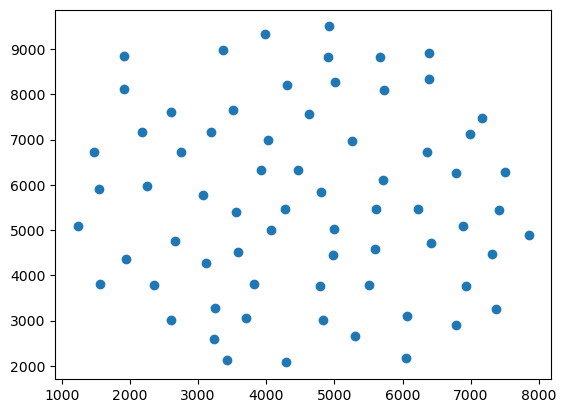

In [5]:
plt.scatter(x=recDF['NAD83_X_m'],
            y=recDF['NAD83_Y_m'])

8.949805500000025


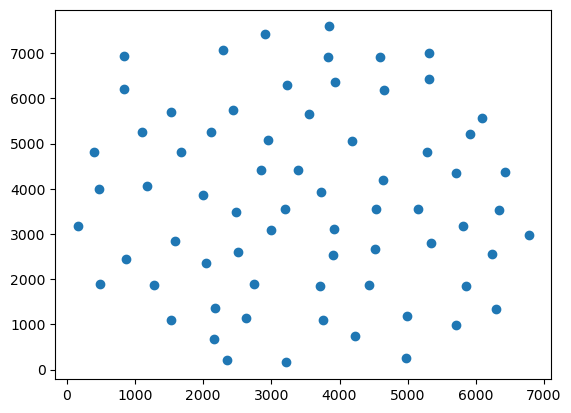

In [6]:
rec_x = recDF['NAD83_X_m'] - mod_xmin
rec_y = recDF['NAD83_Y_m'] - mod_ymin
rec_z = abs(recDF['z_m'] + datum)

print(min(rec_z))
plt.scatter(x=rec_x,
            y=rec_y)

In [7]:
# RECEIVERS
recs = np.vstack((rec_x, rec_z, rec_y))
recs = np.round(recs, decimals=-1)
nr = recs.shape[1]
print(recs.shape)

np.savetxt(os.path.join(rec_outpath,'TOC2ME_surfacenodes_xzy_5m.dat'),
           recs.T.astype(np.float32), 
           fmt='%.4f')

(3, 69)


In [8]:
np.min(recs, axis=1)

array([160.,  10., 160.])